# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Mihail Ababii
## Number: 46435

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [92]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

In [93]:
idx=rd.permutation(X1.shape[0])
X1=X1[idx]*1.#/255-.5#Normalization
y1=y1[idx]


idx=np.argsort(y2)
y2=y2[idx]
X2=X2[idx,:]*1.#/255-.5#Normalization

# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function

## 1.a)


### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.

In [94]:
mlp=keras.Sequential()
mlp.add(keras.layers.Flatten(input_shape=[28,28]))
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(10, activation="softmax"))

mlp.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
mlp.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_122 (Dense)           (None, 50)                39250     
                                                                 
 dense_123 (Dense)           (None, 50)                2550      
                                                                 
 dense_124 (Dense)           (None, 50)                2550      
                                                                 
 dense_125 (Dense)           (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


## 1.b)


### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). Also include the test data as the validation set during training.

In [96]:
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
train = mlp.fit(X1, Y1, epochs=100, batch_size=5000, validation_data=(X2, Y2))

Epoch 1/100
2/2 [==============================] - 1s 126ms/step - loss: 67.3796 - accuracy: 0.1198 - val_loss: 40.1987 - val_accuracy: 0.1522
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 35.4051 - accuracy: 0.1638 - val_loss: 27.3936 - val_accuracy: 0.1762
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 23.5123 - accuracy: 0.2000 - val_loss: 20.7982 - val_accuracy: 0.1974
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 17.3604 - accuracy: 0.2465 - val_loss: 16.9372 - val_accuracy: 0.2204
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 13.5394 - accuracy: 0.2928 - val_loss: 14.2336 - val_accuracy: 0.2466
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 10.9490 - accuracy: 0.3326 - val_loss: 12.2069 - val_accuracy: 0.2628
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 9.0296 - accuracy: 0.3729 - val_loss: 10.6415 - val_accuracy: 0.2824
Epoch 

## 1.c)


### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.

In [97]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 100.0, 0.0, 10.0)

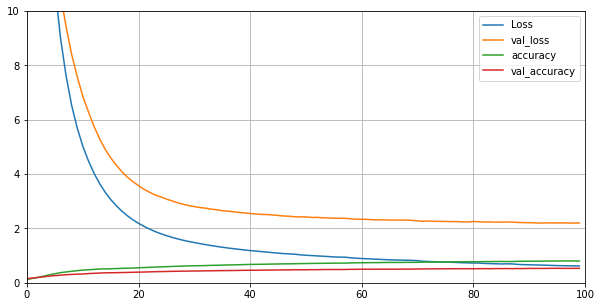

In [98]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='Loss')
plt.plot(h['val_loss'], label='val_loss')
plt.plot(h['accuracy'], label='accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.axis([0,100,0,10])

### Por observação do grafico podemos observar que a rede estagnou, ou seja, o aumento de epoch não iria melhorar consideravelmente os resusltados obtido. É tambem possivel observar que tamnto a loss como a val_loss são representados por uma exponencial decrescente, o que significa que o modelo é bem comportado, ou seja, o seu valor não aumenta comparativa aos epoch anteriores. Para finalizar, pode-se concluir que a partir da epoch 60/70 o valor da acuracy não aumenta muito, melhorando apenas o loss do modelo.

## 1.d)

### d) Print the total number of errors and the confusion matrix for the test dataset.

In [99]:
y2e=mlp.predict(X2)
y2e=np.argmax(y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[306  12   2  22  41  25  20  34  22  16]
 [  4 282  37   8  34  10  47   5  44  29]
 [ 10  42 232  21  29  30  28  17  49  42]
 [ 10  41  19 257  10  27  20  14  84  18]
 [ 31  41  29   8 260  16  32  26  26  31]
 [  9  23  69  17  13 270  23   7  59  10]
 [  8  29  41   7  45   5 320  12  22  11]
 [ 19  13  11  16  79   5  85 214  37  21]
 [ 21  58  29  24  24  36  30  19 239  20]
 [  6  29  32   6  51   8  36  17  33 282]]
Total number of erros 2338 (in 5000)


<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network with the same architecture of the MLP from the previous question. The only difference being the input layer.

## 2.a)

### a) Pre-process the data using the function  $\texttt{PCA(withen=True)}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 250 principal componentes of the data. Use the pre-processed data in the following items.

In [100]:
from sklearn.decomposition import PCA

In [101]:
X1f=X1.reshape((X1.shape[0],28*28))*1.
X2f=X2.reshape((X2.shape[0],28*28))*1.
print('Training set:',X1f.shape,X1f.dtype)
print('Test set:    ',X2f.shape,X2f.dtype)

Training set: (10000, 784) float64
Test set:     (5000, 784) float64


In [102]:
pca=PCA( n_components = 250, whiten = True).fit(X1f)
X1p=pca.transform(X1f)
X2p=pca.transform(X2f)
print('Nº of Principal Components kept: %d'%X1p.shape[1])

Nº of Principal Components kept: 250


## 2.b)


### b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set and include the test data as the validation set during training.

In [103]:
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(50, activation="relu"))
mlp.add(keras.layers.Dense(10, activation="softmax"))

mlp.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:

train = mlp.fit(X1p, Y1, epochs=100, batch_size=5000, validation_data=(X2p, Y2))

Epoch 1/100
2/2 [==============================] - 1s 132ms/step - loss: 2.4822 - accuracy: 0.1078 - val_loss: 2.4464 - val_accuracy: 0.1112
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 2.4200 - accuracy: 0.1113 - val_loss: 2.4084 - val_accuracy: 0.1126
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 2.3801 - accuracy: 0.1183 - val_loss: 2.3784 - val_accuracy: 0.1154
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 2.3472 - accuracy: 0.1253 - val_loss: 2.3537 - val_accuracy: 0.1180
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 2.3190 - accuracy: 0.1342 - val_loss: 2.3333 - val_accuracy: 0.1240
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 2.2944 - accuracy: 0.1453 - val_loss: 2.3160 - val_accuracy: 0.1288
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 2.2722 - accuracy: 0.1584 - val_loss: 2.3009 - val_accuracy: 0.1412
Epoch 8/100
2/2 [==

## 2.c)

### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results. Also print the total number of errors and the confusion matrix for the test dataset.

In [105]:
y2e=mlp.predict(X2p)
y2e=np.argmax(y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[321   1   9  16  43  30   4  29  33  14]
 [  4 309  35  17  30   6  46   7  19  27]
 [  3  28 286  23  36  13  30  20  38  23]
 [  1  17  25 341  17  26  16  11  21  25]
 [ 28  26  26  21 302  13  24  16  17  27]
 [  6  16  68  11   8 336  27   5  16   7]
 [  9  19  44  21  19   7 341  12  18  10]
 [ 27  19  13  13  55   8  32 267  33  33]
 [  9  23  46  23  18  14  23   6 323  15]
 [ 13  32  34   4  29   8  15  20  33 312]]
Total number of erros 1862 (in 5000)


In [106]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 100.0, 0.0, 2.5)

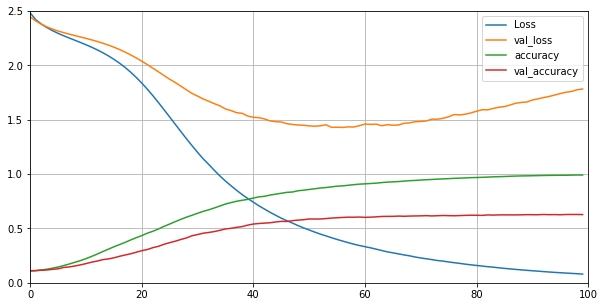

In [107]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='Loss')
plt.plot(h['val_loss'], label='val_loss')
plt.plot(h['accuracy'], label='accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.axis([0,100,0,2.5])

### Contrariamente ao grafico sem PCA, neste, o modelo apresenta comportar-se de forma pior, pois ainda que o loss tenha diminuido consideravelmente, o val_loss apresenta um crescimento a partir da epoch 50. Ainda assim, este apresenta uma melhoria do accuracy.

<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this new network. Make sure the test results are better than in the previous 2 questions.

In [136]:
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(200, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(200, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(200, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(10, activation="softmax"))

mlp.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
train = mlp.fit(X1p, Y1, epochs=500, batch_size=10000, validation_data=(X2p, Y2))

Epoch 1/500
1/1 [==============================] - 1s 639ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 1.1558 - val_accuracy: 0.7850
Epoch 2/500
1/1 [==============================] - 0s 122ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 1.1569 - val_accuracy: 0.7864
Epoch 3/500
1/1 [==============================] - 0s 131ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 1.1574 - val_accuracy: 0.7880
Epoch 4/500
1/1 [==============================] - 0s 128ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 1.1593 - val_accuracy: 0.7876
Epoch 5/500
1/1 [==============================] - 0s 124ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 1.1585 - val_accuracy: 0.7864
Epoch 6/500
1/1 [==============================] - 0s 125ms/step - loss: 0.0103 - accuracy: 0.9959 - val_loss: 1.1584 - val_accuracy: 0.7870
Epoch 7/500
1/1 [==============================] - 0s 122ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 1.1590 - val_accuracy: 0.7858
Epoch 8/500
1

In [142]:
y2e=mlp.predict(X2p)
y2e=np.argmax(y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[409   0   1   1  19  12   2  26  22   8]
 [  1 384  18   5  12   3  37   5  18  17]
 [  1  20 345  24  15   8  34  16  20  17]
 [  1   5  16 446   4   3   9   0  13   3]
 [ 27  16  13  12 383   5  12  10  11  11]
 [  2  13  48   7  10 386   9   5  16   4]
 [  3   8  22   7  17   2 426   5   7   3]
 [ 12   7   7   2  32   0  28 373  15  24]
 [  7  14   6  10   5   7  13   4 429   5]
 [  3  22  15   1  23   6   9   9  19 393]]
Total number of erros 1026 (in 5000)


In [143]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 500.0, 0.0, 2.5)

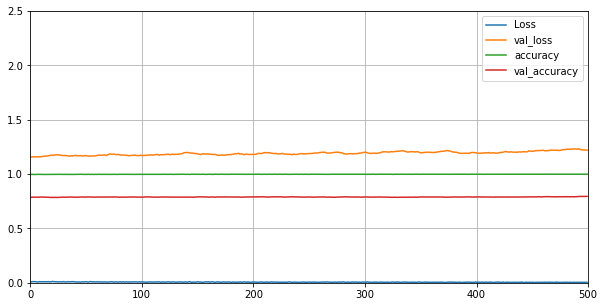

In [144]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='Loss')
plt.plot(h['val_loss'], label='val_loss')
plt.plot(h['accuracy'], label='accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.axis([0,500,0,2.5])